### Swati Dogra - DSC 630  - Final Project

#### Predictive Analytics and Recommendation Systems for Cosmetics Products

In [5]:
# Load and Explore the Data

import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('C:/Users/swati/DSC 630/cosmetics.csv')

# Display the first few rows of the dataset
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [7]:
# Remove the Ingredients column
df = df.drop(columns=['Ingredients'])

# Display the updated dataframe
print(df.head())

         Label           Brand                                           Name  \
0  Moisturizer          LA MER                                Crème de la Mer   
1  Moisturizer           SK-II                       Facial Treatment Essence   
2  Moisturizer  DRUNK ELEPHANT                     Protini™ Polypeptide Cream   
3  Moisturizer          LA MER                    The Moisturizing Soft Cream   
4  Moisturizer    IT COSMETICS  Your Skin But Better™ CC+™ Cream with SPF 50+   

   Price  Rank  Combination  Dry  Normal  Oily  Sensitive  
0    175   4.1            1    1       1     1          1  
1    179   4.1            1    1       1     1          1  
2     68   4.4            1    1       1     1          0  
3    175   3.8            1    1       1     1          1  
4     38   4.1            1    1       1     1          1  


#### Descriptive Analysis

##### Summary Statistics: Calculate mean, median, mode, standard deviation, for attributes like Price and Rank.

In [412]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean
mean_price = df['Price'].mean()
mean_rank = df['Rank'].mean()

# Calculate median
median_price = df['Price'].median()
median_rank = df['Rank'].median()

# Calculate mode
mode_price = df['Price'].mode()[0]
mode_rank = df['Rank'].mode()[0]

# Calculate standard deviation
std_price = df['Price'].std()
std_rank = df['Rank'].std()

# Print the results
print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")
print(f"Standard Deviation of Price: {std_price}")

print("\n")

print(f"Mean Rank: {mean_rank}")
print(f"Median Rank: {median_rank}")
print(f"Mode Rank: {mode_rank}")
print(f"Standard Deviation of Rank: {std_rank}")

Mean Price: 55.58423913043478
Median Price: 42.5
Mode Price: 38
Standard Deviation of Price: 45.014428945492625


Mean Rank: 4.153260869565218
Median Rank: 4.3
Mode Rank: 4.4
Standard Deviation of Rank: 0.6339180057003525


##### Visualizations: Histograms, boxplots, and bar charts to visualize the distribution of Price, Rank, and the frequency of different Labels and Brands.

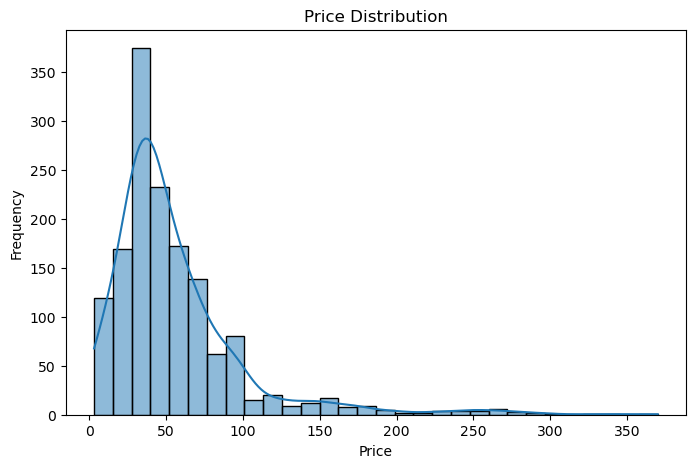

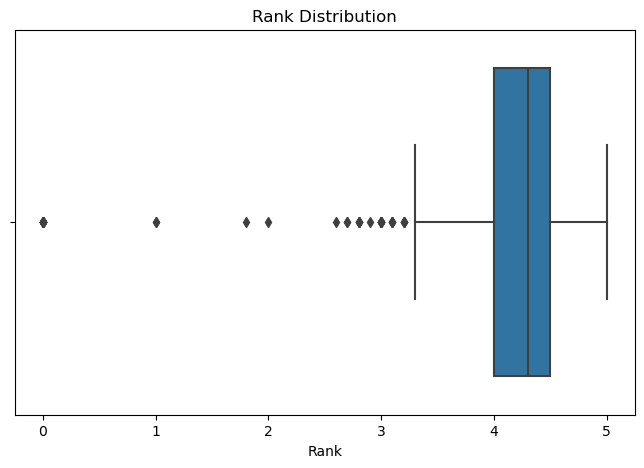

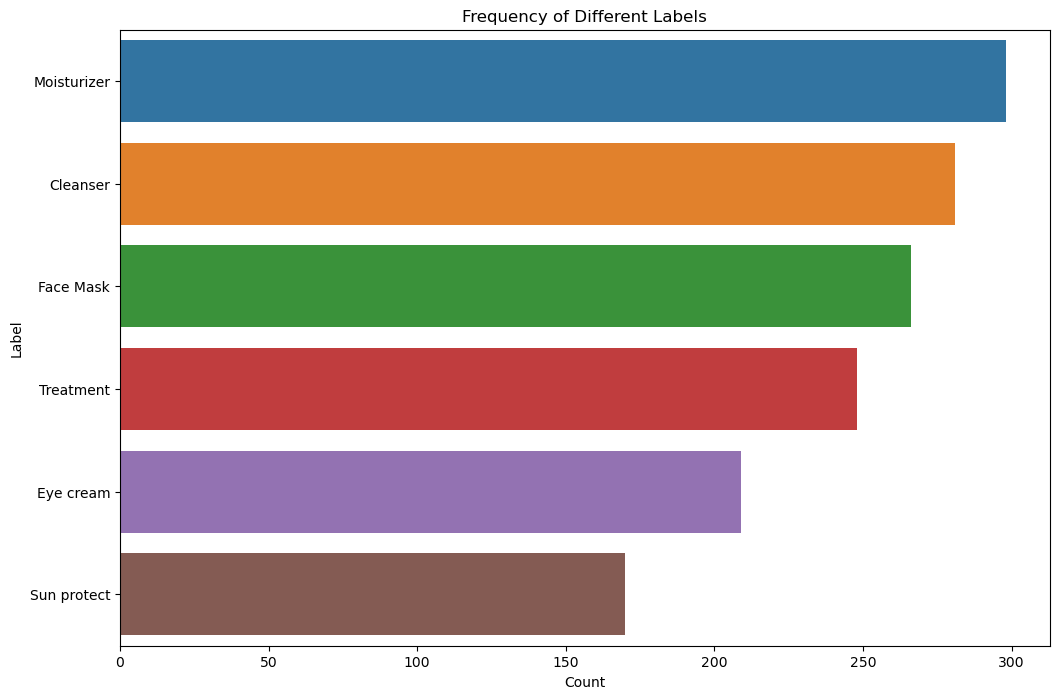

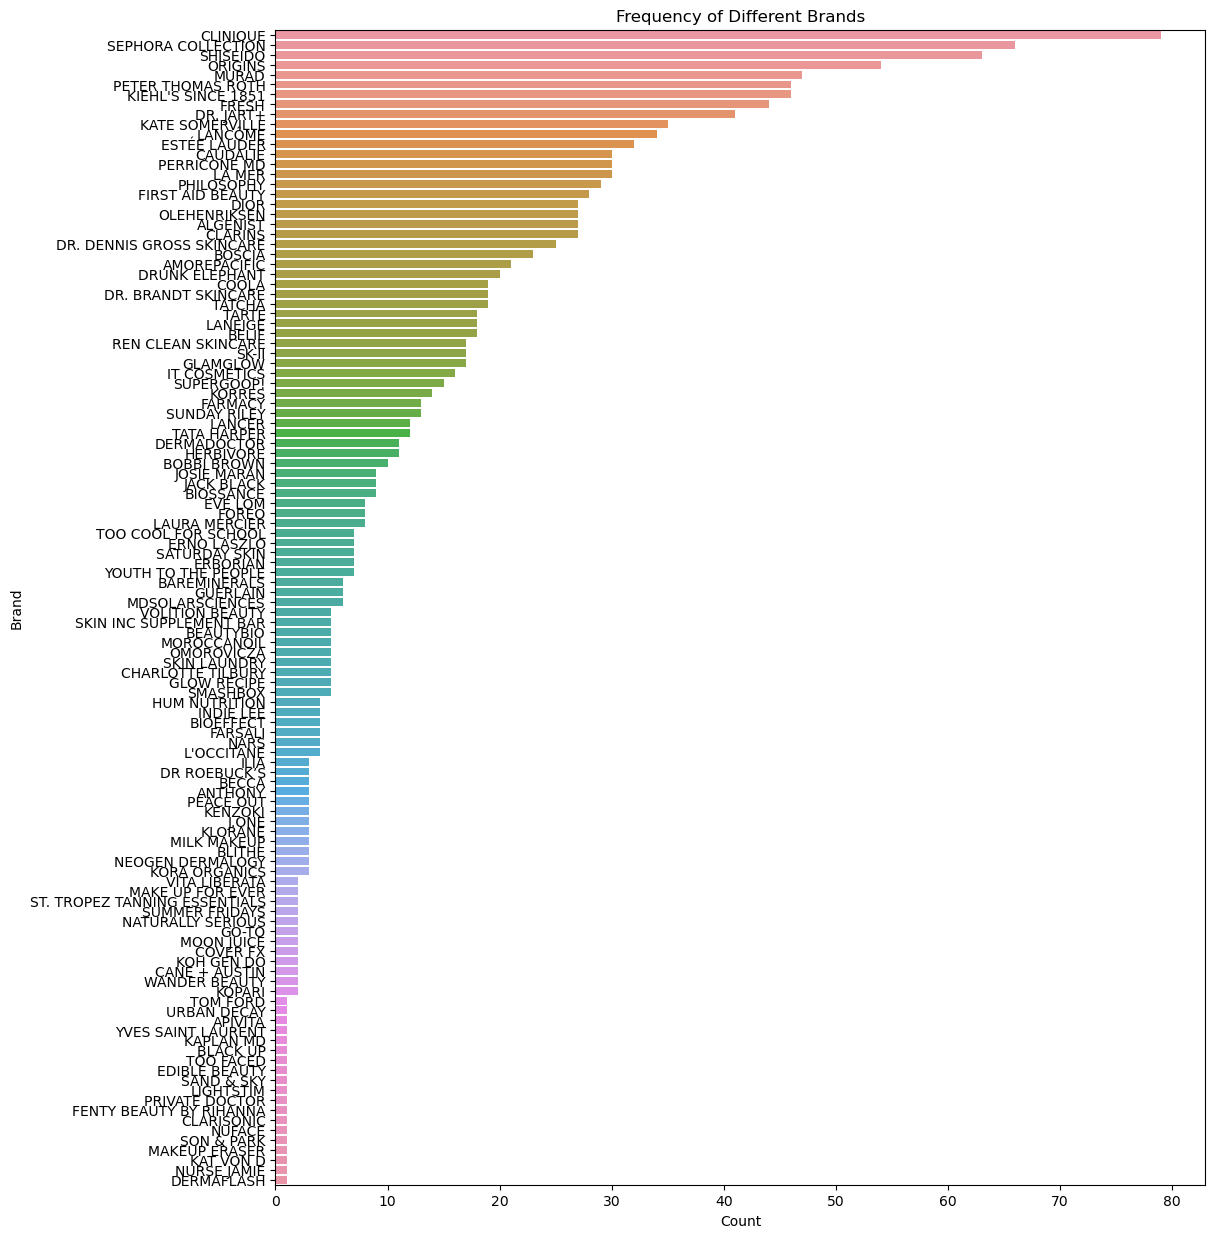

In [415]:
import warnings
warnings.filterwarnings('ignore')


# Visualizations
# Histogram Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box Plot for Rank Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Rank'])
plt.title('Rank Distribution')
plt.xlabel('Rank')
plt.show()

# Bar chart for Frequency of Different Labels
plt.figure(figsize=(12, 8))
sns.countplot(y='Label', data=df, order=df['Label'].value_counts().index)
plt.title('Frequency of Different Labels')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()

# Bar chart for Frequency of Different Brands
plt.figure(figsize=(12, 15))
sns.countplot(y='Brand', data=df, order=df['Brand'].value_counts().index)
plt.title('Frequency of Different Brands')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()


#### Predictive Modeling

##### Linear Regression: Predict the Price of a product based on its attributes like Rank, and Skin Type.

In [419]:
# Convert columns to appropriate data types

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')

# Drop NA values
df = df.dropna()  


In [421]:
import statsmodels.api as sm


# Prepare the data for linear regression
X = df[['Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy/indicator variables
y = df['Price']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     4.239
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           0.000307
Time:                        13:14:12   Log-Likelihood:                -7679.4
No. Observations:                1472   AIC:                         1.537e+04
Df Residuals:                    1465   BIC:                         1.541e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          62.3363      7.856      7.935      

###### For the above, OLS Regression Results - 
R-Squared: Proportion of the variance in the dependent variable (Price) that is predictable from the independent variables. 
We see the value is 0.017, indicating not a good model fit.

Coef: The estimated change in the dependent variable for a one-unit change in the independent variable, assuming all other variables are constant.Sign (+/-) indicates the direction of the relationship. Magnitude indicates the strength.
We can see how much the Price changes with each of the variables - Rank, Combination, Dry, Normal, Oily and Sensitive

P-values: Indicates whether the relationships observed are statistically significant.P-values less than 0.05 (common threshold) suggest that the coefficients are significantly different from zero.
P-values are all less than 0.05 except for Rank, Oily and Sensitive, suggesting that the coefficients are statistically significant for Combination, Dry and Normal collections.

##### Logistic Regression: Classify products into categories like high-rated vs. low-rated based on attributes like Skin Type.

In [425]:

# Create a binary variable for high-rated vs. low-rated products (example: threshold = 4.5)
df['High_Rated'] = (df['Rank'] >= 4.5).astype(int)

# Prepare the data for logistic regression
X = df[['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy/indicator variables
y = df['High_Rated']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()
predictions = logit_model.predict(X)

# Print the summary of the logistic regression
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.580667
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             High_Rated   No. Observations:                 1472
Model:                          Logit   Df Residuals:                     1466
Method:                           MLE   Df Model:                            5
Date:                Sun, 27 Oct 2024   Pseudo R-squ.:                0.006235
Time:                        13:14:13   Log-Likelihood:                -854.74
converged:                       True   LL-Null:                       -860.10
Covariance Type:            nonrobust   LLR p-value:                   0.05712
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.0172      0.102     -9.974      0.000      -1.217      -0.817
Combination     0.1596    

###### For the above Logit regression results, 

Coefficients show the effect of each predictor on the log-odds of being high-rated. Positive coefficients increase the probability of the outcome; negative coefficients decrease it. Only the Normal skin type has a positive coefficient.
    
Odds Ratios (Exp(Coef)) can be interpreted as how much more likely the product is to be high-rated with a one-unit increase in the predictor. Exp(Coef) > 1 increases the odds, < 1 decreases the odds. All the skin types are less than one with Normal skin type being the only positive indicator with a value of 0.58

P-values less than 0.05 indicate significant predictors. None of the skin type categories indicate they are significant predictors.

Confidence Intervals that do not include 1 indicate a significant predictor.

##### Clustering: For market segmentation and to identify patterns in the data based on Price and Rank

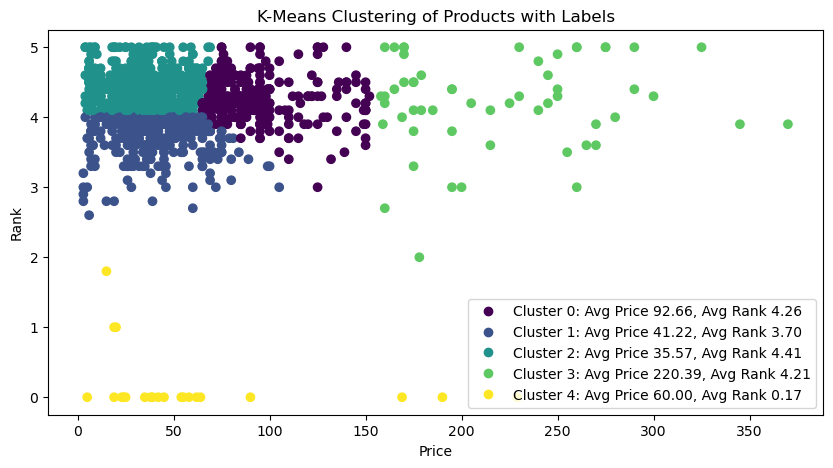

Cluster Labels:
Cluster 0: Avg Price 92.66, Avg Rank 4.26
Cluster 1: Avg Price 41.22, Avg Rank 3.70
Cluster 2: Avg Price 35.57, Avg Rank 4.41
Cluster 3: Avg Price 220.39, Avg Rank 4.21
Cluster 4: Avg Price 60.00, Avg Rank 0.17


In [429]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the features for clustering
features = df[['Price', 'Rank']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit the K-Means clustering model
kmeans = KMeans(n_clusters=5, random_state=42)  # Change n_clusters to the desired number of clusters
kmeans.fit(scaled_features)

# Add cluster labels to the original data
df['Cluster'] = kmeans.labels_

# Define cluster labels based on centroids
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
labels = []

for i, center in enumerate(cluster_centers):
    labels.append(f"Cluster {i}: Avg Price {center[0]:.2f}, Avg Rank {center[1]:.2f}")

# Map the labels to the clusters
df['Cluster_Label'] = df['Cluster'].map(dict(enumerate(labels)))

# Visualize the clusters with labels
plt.figure(figsize=(10, 5))
scatter = plt.scatter(df['Price'], df['Rank'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Products with Labels')
plt.xlabel('Price')
plt.ylabel('Rank')
plt.legend(handles=scatter.legend_elements()[0], labels=labels)
plt.show()

# Display the cluster labels
print('Cluster Labels:')
for label in labels:
    print(label)


###### Fro above K Means clustering, we can see that Cluster 2 - with lowest avg. price is also having a better avg. rank for products in that cluster.

##### Build and Evaluate the Model

###### Model Evaluation with Price as target variable and selecting the features Brand, Rank, Skin tpyes

In [452]:
# Preprocess the Data:

# Handle categorical variables (Brand, Skin Type) using one-hot encoding.
# Handle missing values if any.


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select features and target variable
X = df[['Label', 'Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']]
y = df['Price']

# One-hot encode the Brand column
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Label'])
    ], remainder='passthrough'
)

X = column_transformer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [454]:
# Train the Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 1760.0089613970588
RMSE: 41.95246073113064
R^2 Score: 0.13448413586987473


###### The Mean Squared Error (MSE) gives an idea of how far off your predictions are from the actual values. The RMSE value of 31 indicates the model is a good fit.
###### The R^2 Score indicates how well the model explains the variability of the target variable.

###### Below is Model Evaluation with Rating Category (high rated vs low rated) products and selecting ingredients, Skin tpyes

In [481]:
# Preprocess the Data
# Convert the rating into binary categories (e.g., high-rated vs. low-rated).
# Handle categorical variables (Label) using one-hot encoding.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create a binary target variable for high-rated vs. low-rated
df['Rating_Category'] = df['Rank'].apply(lambda x: 1 if x >= 4 else 0)

# Select features and target variable
X = df[['Label', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']]
y = df['Rating_Category']

# One-hot encode the Ingredients column
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Label'])
    ], remainder='passthrough'
)

X = column_transformer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Mean Squared Error: 0.22171945701357465
RMSE: 0.4708709557974187
R^2 Score: -0.20842516390012578
Accuracy: 0.7782805429864253
Confusion Matrix:


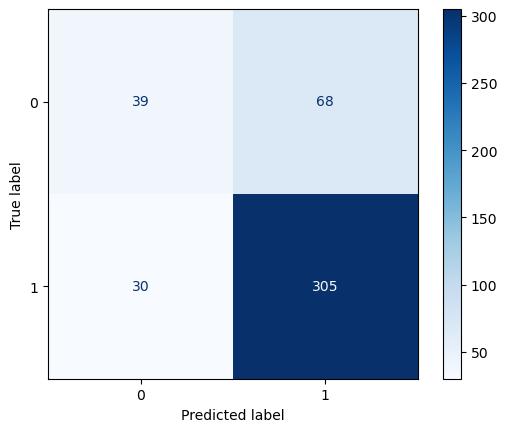

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.36      0.44       107
           1       0.82      0.91      0.86       335

    accuracy                           0.78       442
   macro avg       0.69      0.64      0.65       442
weighted avg       0.76      0.78      0.76       442



In [483]:
# Train the Logistic Regression Model

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


# Initialize and train the model
model = LogisticRegression()
best_model = model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"R^2 Score: {r2}")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")

print("Confusion Matrix:")
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("Classification Report:")
print(class_report)


###### Accuracy: The proportion of correctly classified instances.
###### Confusion Matrix: A table showing the performance of the classification model.
###### Classification Report: Includes precision, recall, and F1-score for each class.

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.57      0.36      0.44       107
           1       0.82      0.91      0.86       335

    accuracy                           0.78       442
   macro avg       0.69      0.64      0.65       442
weighted avg       0.76      0.78      0.76       442



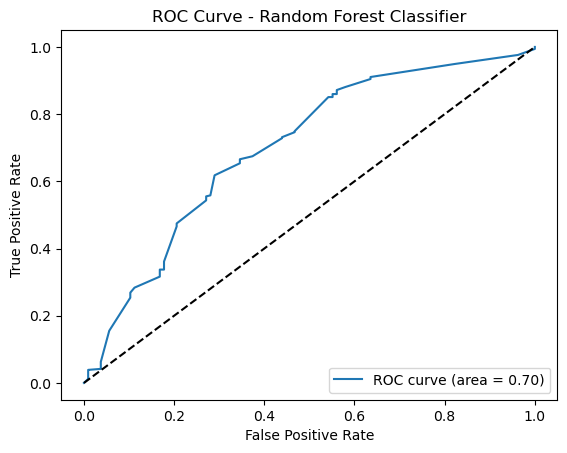

In [474]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt


# Initialize and train the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rfc = rfc.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test, y_pred_rfc))

# Generate ROC curve
y_pred_proba_rfc = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rfc)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()


K-Nearest Neighbors Classifier
              precision    recall  f1-score   support

           0       0.53      0.22      0.32       107
           1       0.79      0.94      0.86       335

    accuracy                           0.76       442
   macro avg       0.66      0.58      0.59       442
weighted avg       0.73      0.76      0.73       442



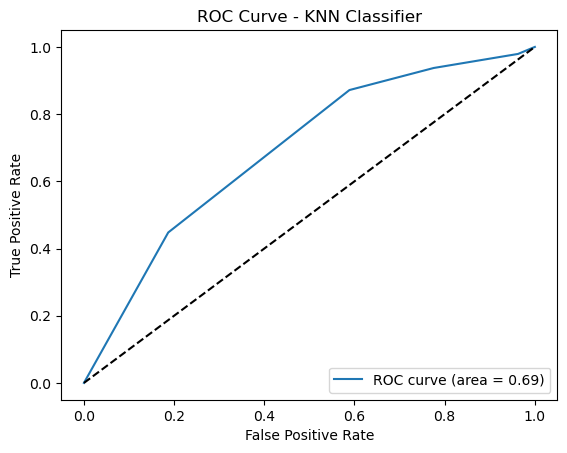

In [476]:
# Initialize and train the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors Classifier")
print(classification_report(y_test, y_pred_knn))

# Generate ROC curve
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Classifier')
plt.legend(loc='lower right')
plt.show()


Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.57      0.36      0.44       107
           1       0.82      0.91      0.86       335

    accuracy                           0.78       442
   macro avg       0.69      0.64      0.65       442
weighted avg       0.76      0.78      0.76       442



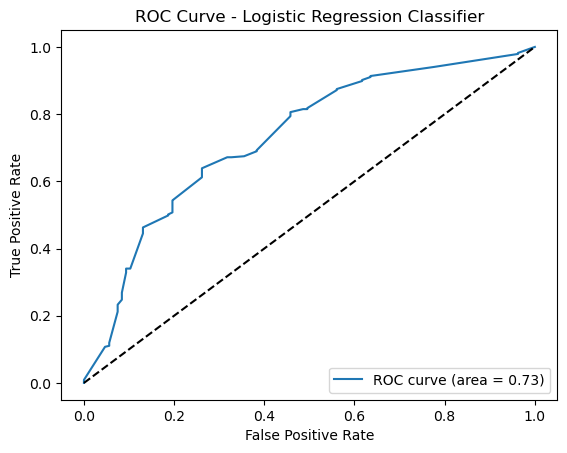

In [478]:
# Initialize and train the Logistic Regression Classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier")
print(classification_report(y_test, y_pred_lr))

# Generate ROC curve
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Classifier')
plt.legend(loc='lower right')
plt.show()
